In [35]:
import pandas as pd
import numpy as np
df = pd.read_csv("jsrt_metadata.csv")

In [36]:
df

,study_id,subtlety,size,age,gender,x,y,state,position,diagnosis
0,JPCLN001.png,5.0,15.0,53,Male,1634.0,692.0,malignant,l.upper lobe,lung cancer
1,JPCLN002.png,5.0,30.0,78,Female,1614.0,1090.0,benign,l.upper lobe(S5),pulmonary hematoma
2,JPCLN003.png,5.0,30.0,63,Female,1303.0,447.0,malignant,l.upper lobe(S1+2),lung cancer
3,JPCLN004.png,5.0,14.0,68,Female,606.0,836.0,benign,r.upper lobe,Inflammatory mass
4,JPCLN005.png,5.0,35.0,73,Female,1438.0,692.0,malignant,l.upper lobe(S3),lung cancer
...,...,...,...,...,...,...,...,...,...,...
242,JPCNN089.png,NaN,NaN,50,Male,NaN,NaN,non-nodule,NaN,NaN
243,JPCNN090.png,NaN,NaN,68,Female,NaN,NaN,non-nodule,NaN,NaN
244,JPCNN091.png,NaN,NaN,81,Male,NaN,NaN,non-nodule,NaN,NaN
245,JPCNN092.png,NaN,NaN,70,Female,NaN,NaN,non-nodule,NaN,NaN


In [37]:
df.isnull().sum()

study_id      0
subtlety     93
size         93
age           0
gender        0
x            93
y            93
state         0
position     93
diagnosis    93
dtype: int64

In [38]:
m = df['subtlety'].astype('float').mean()
df['subtlety'].replace(np.nan,m, inplace = True)

In [39]:
m = df['size'].astype('float').mean()
df['size'].replace(np.nan,m, inplace = True)

In [40]:
m = df['x'].astype('float').mean()
df['x'].replace(np.nan,m, inplace = True)

m = df['y'].astype('float').mean()
df['y'].replace(np.nan,m, inplace = True)

In [41]:
mx = df['position'].value_counts().idxmax()
df['position'].replace(np.nan,mx, inplace = True)

mx = df['diagnosis'].value_counts().idxmax()
df['diagnosis'].replace(np.nan,mx, inplace = True)

In [42]:
df.isnull().sum()

study_id     0
subtlety     0
size         0
age          0
gender       0
x            0
y            0
state        0
position     0
diagnosis    0
dtype: int64

In [43]:
mm = df['diagnosis'].value_counts()

In [44]:
mm

lung cancer                                       149
lung cancer(adenocarcinoma)                        23
tuberculoma                                        14
granuloma                                           8
lung cancer(bronchioloalveolar cell carcinoma)      7
unknown                                             4
metastasis of colon cancer                          4
inflammatory mass                                   4
pulmonary tuberculosis                              3
lung abscess                                        2
Cryptococcosis                                      2
lung cancer(squamous cell carcinoma)                2
Inflammatory mass                                   2
pulmonary hematoma                                  2
susp. inflammatory mass                             2
hamartoma                                           2
sclerosing hemangioma                               2
lung cancer(large cell carcinoma)                   1
susp. hamartoma             

In [45]:
import matplotlib as plt
from matplotlib import pyplot
df['state'].value_counts()

malignant     100
non-nodule     93
benign         54
Name: state, dtype: int64

(array([30.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  1. ,  15.8,  30.6,  45.4,  60.2,  75. ,  89.8, 104.6, 119.4,
        134.2, 149. ]),
 <BarContainer object of 10 artists>)

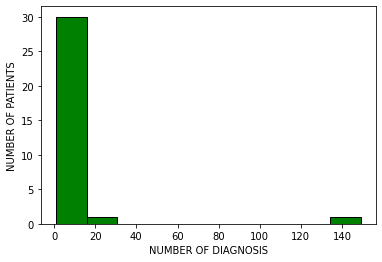

In [46]:

plt.pyplot.xlabel('NUMBER OF DIAGNOSIS')
plt.pyplot.ylabel('NUMBER OF PATIENTS')
plt.pyplot.hist(df['diagnosis'].value_counts(),color='green',ec='black')

In [47]:
df[['diagnosis','gender']].value_counts()

diagnosis                                       gender
lung cancer                                     Male      75
                                                Female    74
lung cancer(adenocarcinoma)                     Female    15
tuberculoma                                     Male       9
lung cancer(adenocarcinoma)                     Male       8
granuloma                                       Male       6
tuberculoma                                     Female     5
unknown                                         Female     4
lung cancer(bronchioloalveolar cell carcinoma)  Female     4
pulmonary tuberculosis                          Male       3
lung cancer(bronchioloalveolar cell carcinoma)  Male       3
metastasis of colon cancer                      Female     3
Cryptococcosis                                  Female     2
hamartoma                                       Female     2
inflammatory mass                               Male       2
                              

([<matplotlib.patches.Wedge at 0x1a93d72ecd0>,
 [Text(-0.027978779917502267, 1.0996441187376615, ''),
  Text(-0.08386393602298345, 1.0967984501423829, ''),
  Text(-0.12564327252603194, 1.0928008821688193, ''),
  Text(-0.22231246450622644, 1.0773008716812438, ''),
  Text(-0.33059105794466775, 1.0491470594759467, ''),
  Text(-0.38351668268902217, 1.0309776690594263, ''),
  Text(-0.4354498396330243, 1.0101403056821234, ''),
  Text(-0.48625613570236015, 0.9866888924538515, ''),
  Text(-0.5235421444077163, 0.9674211197968391, ''),
  Text(-0.5479793660068982, 0.95379170390116, ''),
  Text(-1.0962429459722334, 0.0908372357908321, ''),
  Text(0.26324732157874103, -1.0680359767730763, ''),
  Text(1.0786928958362405, -0.21545680883282797, ''),
  Text(1.0949989339883186, 0.10477277587449062, ''),
  Text(1.075865278730767, 0.22915911943793374, ''),
  Text(1.0591268866243095, 0.2970694161799516, ''),
  Text(1.0285178263072743, 0.39006548292326493, ''),
  Text(1.0073506127108325, 0.4418650733777342,

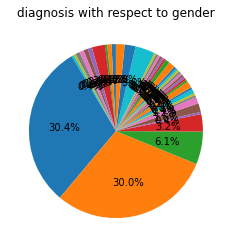

In [48]:
plt.pyplot.title('diagnosis with respect to gender')
plt.pyplot.pie(df.groupby('diagnosis')['gender'].value_counts(),autopct='%1.1f%%',startangle=90)

In [49]:
df[['diagnosis','state']].value_counts()

diagnosis                                       state     
lung cancer                                     non-nodule    93
                                                malignant     56
lung cancer(adenocarcinoma)                     malignant     23
tuberculoma                                     benign        14
granuloma                                       benign         8
lung cancer(bronchioloalveolar cell carcinoma)  malignant      7
metastasis of colon cancer                      malignant      4
unknown                                         benign         4
inflammatory mass                               benign         4
pulmonary tuberculosis                          benign         3
lung abscess                                    benign         2
Inflammatory mass                               benign         2
susp. inflammatory mass                         benign         2
sclerosing hemangioma                           benign         2
pulmonary hematoma             

([<matplotlib.patches.Wedge at 0x1a93d86fa00>,
 [Text(-0.027978779917502267, 1.0996441187376615, ''),
  Text(-0.08386393602298345, 1.0967984501423829, ''),
  Text(-0.12564327252603194, 1.0928008821688193, ''),
  Text(-0.24964196191822746, 1.0712977601253624, ''),
  Text(-0.38351668268902217, 1.0309776690594263, ''),
  Text(-0.4610021349601742, 0.9987377191045512, ''),
  Text(-0.5358040939230667, 0.9606841171453194, ''),
  Text(-1.088254003173798, -0.16032225228022376, ''),
  Text(0.4987661641512061, -0.9804245577798898, ''),
  Text(1.0949989450240396, -0.1047726605381412, ''),
  Text(1.0758653001861875, 0.22915901870815567, ''),
  Text(1.047023465108341, 0.33725637653352514, ''),
  Text(1.0073506566668708, 0.44186497316807555, ''),
  Text(0.995785802066112, 0.4673442375846206, ''),
  Text(0.9772328540002831, 0.5049910385961927, ''),
  Text(0.9572572701258133, 0.5419026838753208, ''),
  Text(0.9208831199740248, 0.6016429832940012, ''),
  Text(0.8807858757667348, 0.6589508639115865, ''),

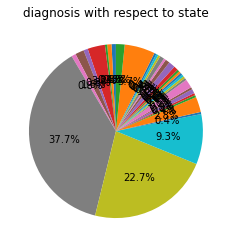

In [50]:
plt.pyplot.title('diagnosis with respect to state')
plt.pyplot.pie(df.groupby('diagnosis')['state'].value_counts(),autopct='%1.1f%%',startangle=90)